In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
import skfuzzy as fuzz
import skfuzzy.membership as mf
from skfuzzy import control as ctrl

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [3]:
# New Antecedent/Consequent objects hold universe variables and membership functions
x = ctrl.Antecedent(np.arange(0, 61, 1), 'x')
y = ctrl.Antecedent(np.arange(0, 13, 1), 'y')
z = ctrl.Consequent(np.arange(0, 6, 1), 'z')



In [8]:
# Generate fuzzy membership functions
x['x1'] = fuzz.trapmf(x.universe, [0, 0, 15,30])
x['x2'] = fuzz.trimf(x.universe, [10, 30, 50])
x['x3'] = fuzz.trapmf(x.universe, [30, 40, 60, 60])



y['y1'] = fuzz.trimf(y.universe, [0, 0, 4])
y['y2'] = fuzz.trimf(y.universe, [2, 6, 12])
y['y3'] = fuzz.trimf(y.universe, [8, 12, 12])



z['z1'] = fuzz.trimf(z.universe, [0, 0, 2])
z['z2'] = fuzz.trimf(z.universe, [1, 3, 5])
z['z3'] = fuzz.trimf(z.universe, [2, 5, 5])


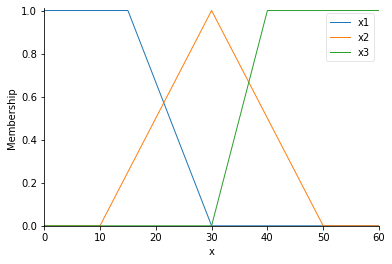

In [9]:
x.view()

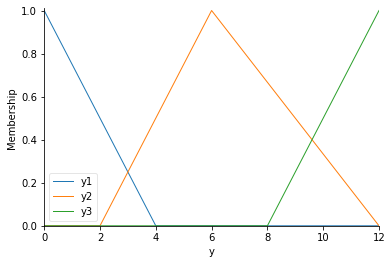

In [10]:
y.view()

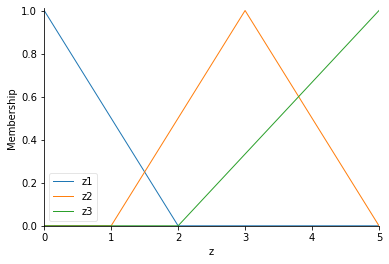

In [11]:
z.view()

In [12]:
#Fuzzy rules
rule1 = ctrl.Rule(x['x1'] & y['y1'], z['z1'])
rule2 = ctrl.Rule(x['x1'] & y['y3'], z['z3'])
rule3 = ctrl.Rule(x['x2'] & y['y2'], z['z2'])
rule4 = ctrl.Rule(x['x2'] & y['y3'], z['z3'])
rule5 = ctrl.Rule(x['x3'] & y['y1'], z['z1'])


#rule1.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

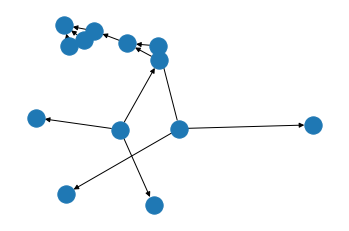

In [13]:
rule2.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

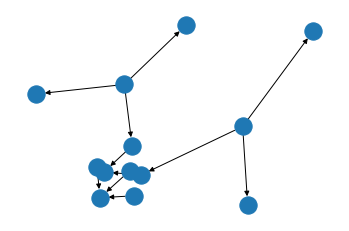

In [14]:
rule3.view()

In [15]:
#Control System Creation


output_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
output = ctrl.ControlSystemSimulation(output_ctrl)


In [16]:
#What would the tip be in the following circumstance:

#FACTS

#Food quality was 6.5
#Service was 9.8

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
output.input['x'] = 45
output.input['y'] = 10

# Crunch the numbers
output.compute()

3.122222222222222


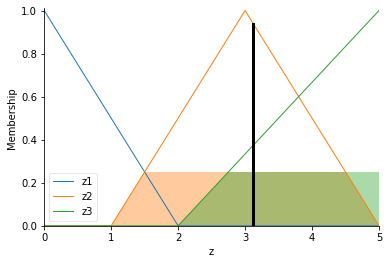

In [17]:
print(output.output['z'])
z.view(sim=output)